In [9]:
from sklearn.datasets import load_iris
import pandas as pd


In [15]:
iris = load_iris()

In [17]:
df = pd.DataFrame(data= iris.data, columns = iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


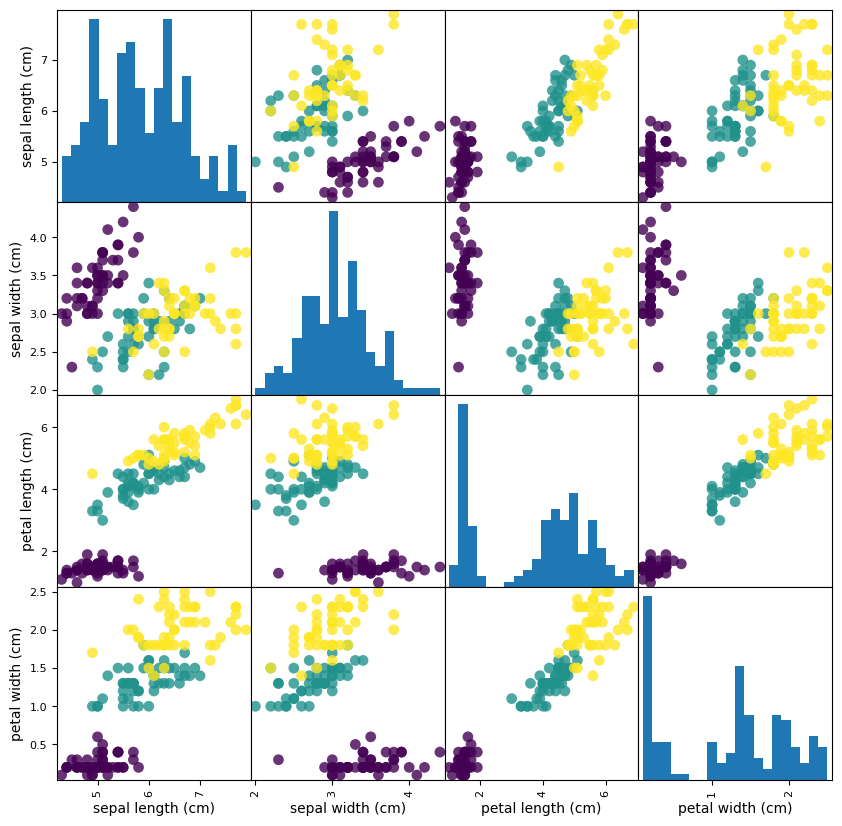

In [29]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df.iloc[:, :-1], c=iris.target, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

In [31]:

from sklearn.model_selection import train_test_split

# Séparer les caractéristiques et la cible
X = df.iloc[:, :-1]
y = df['species']

In [33]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, X_test.shape)
from sklearn.neighbors import KNeighborsClassifier

(120, 4) (30, 4)


In [37]:
# Créer le modèle
knn = KNeighborsClassifier(n_neighbors=3)

In [39]:
# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prédire les classes pour l'ensemble de test
y_pred = knn.predict(X_test)

In [43]:
# Évaluer les performances
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


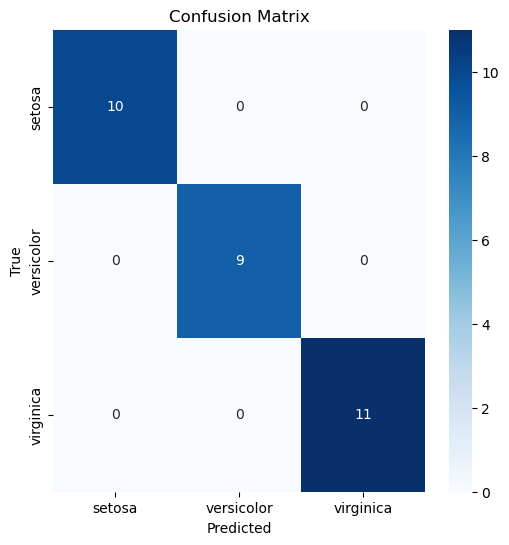

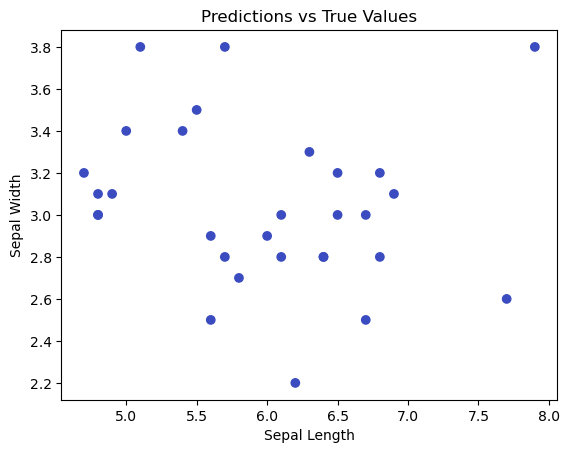

In [47]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Exemple de visualisation de prédictions
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=(y_pred == y_test), cmap='coolwarm', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Predictions vs True Values')
plt.show()